In [556]:
import pandas as pd
import numpy as np

In [557]:
df = pd.read_csv("./data/final01.csv", encoding= 'utf-8-sig', thousands=',')



In [558]:
# donli, danjiname, doro 삭제 

In [559]:
# df_ipji = df[['areadaprice', 'market', 'school', 'station', 'bank', 'cafe', 'hospital']]
# df_ipji

In [560]:
df = df.drop(['nambang','danjigubn','danjiname', 'donli', 'giha', 'gisa', 'gukag', 'clean', 'guard', 'water', 'amenitiesCnt', 'sedesu', 'food', 'sigog', 'siheg', 'gucha', 'doro','cctv','ellbe', 'eill'], axis=1)

In [561]:
df = df.drop(['amenities'],axis=1)

In [562]:
df = df.drop(['danjicode'], axis=1)

In [563]:
df

,areadaprice,market,school,station,bank,cafe,hospital
0,4395.0,5,4,2,40,107,91
1,3480.0,6,4,2,43,122,98
2,7701.0,5,0,2,48,174,294
3,3141.0,8,0,3,70,317,313
4,10629.0,4,5,3,6,12,11
...,...,...,...,...,...,...,...
2415,2087.0,5,2,0,16,32,42
2416,3164.0,4,1,1,15,58,35
2417,2095.0,2,2,0,21,48,33
2418,1752.0,3,3,1,9,25,7


In [564]:
df.columns

Index(['areadaprice', 'market', 'school', 'station', 'bank', 'cafe',
       'hospital'],
      dtype='object')

In [565]:
# gu_df = df['doro'].str.split(' ').str[1]
# gu_df = pd.DataFrame(gu_df)

In [566]:
# gu_df.columns = ["gu"]

In [567]:
# df = pd.concat([df, gu_df], axis=1)

In [568]:
# df['gu'].value_counts()

In [569]:
df.describe()

,areadaprice,market,school,station,bank,cafe,hospital
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,4223.825992,3.754959,2.838017,1.794628,16.143388,49.682645,32.024380
std,1744.297967,2.118804,1.804237,1.481724,10.423390,43.828965,29.954889
min,1096.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2985.000000,2.000000,2.000000,1.000000,9.000000,22.000000,13.000000
50%,3847.200000,3.000000,3.000000,2.000000,14.000000,38.000000,26.000000
75%,5059.550000,5.000000,4.000000,3.000000,21.000000,62.000000,42.000000
max,12348.000000,12.000000,10.000000,10.000000,74.000000,554.000000,380.000000


In [570]:
df.isnull().sum()

areadaprice    0
market         0
school         0
station        0
bank           0
cafe           0
hospital       0
dtype: int64

In [571]:
# df = df.dropna(subset=['ellbe', 'gisa', 'giha'])

In [572]:
#df = df.dropna(thresh=20)

In [573]:
# 나중에 수치데이터로 바꿔줘야 할듯

In [574]:
# df.loc[:,['danjigubn']] = df.loc[:,['danjigubn']].fillna('아파트')

In [575]:
df.isnull().sum()

areadaprice    0
market         0
school         0
station        0
bank           0
cafe           0
hospital       0
dtype: int64

In [576]:
df.count()

areadaprice    2420
market         2420
school         2420
station        2420
bank           2420
cafe           2420
hospital       2420
dtype: int64

In [577]:
#df['sigog'] = df['sigog'].str.replace('주','')

In [578]:
#df["sigog"] = df["sigog"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [579]:
# df = df.dropna()
# df.count()

In [580]:
# df['sigog'].value_counts()[:50]

In [581]:
# df.loc[~((df['sigog'] == '현대건설') | (df['sigog'] == '삼성물산') | (df['sigog']=='현대산업개발') | (df['sigog'] == '대우건설')), 'sigog'] = "other"

In [582]:
# df.isnull().sum()

In [583]:
# df['sigog'].value_counts()

In [584]:
# categories = df.columns[df.dtypes=="object"]
# print(categories)

In [585]:
from sklearn.preprocessing import LabelEncoder

In [586]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if df[cat].dtypes == "object":
        le = le.fit(df[cat])
        df[cat] = le.transform(df[cat])

danjigubn


KeyError: 'danjigubn'

In [587]:
df.dtypes

areadaprice    float64
market           int64
school           int64
station          int64
bank             int64
cafe             int64
hospital         int64
dtype: object

In [588]:
df_corr = df.corr()

In [589]:
df_corr

,areadaprice,market,school,station,bank,cafe,hospital
areadaprice,1.000000,0.247601,-0.001195,0.251017,0.111967,0.125650,0.203746
market,0.247601,1.000000,0.122298,0.185823,0.287175,0.218134,0.309903
school,-0.001195,0.122298,1.000000,0.003324,-0.096869,-0.136507,-0.067414
station,0.251017,0.185823,0.003324,1.000000,0.431185,0.391553,0.268566
bank,0.111967,0.287175,-0.096869,0.431185,1.000000,0.716470,0.675156
cafe,0.125650,0.218134,-0.136507,0.391553,0.716470,1.000000,0.619647
hospital,0.203746,0.309903,-0.067414,0.268566,0.675156,0.619647,1.000000


In [590]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

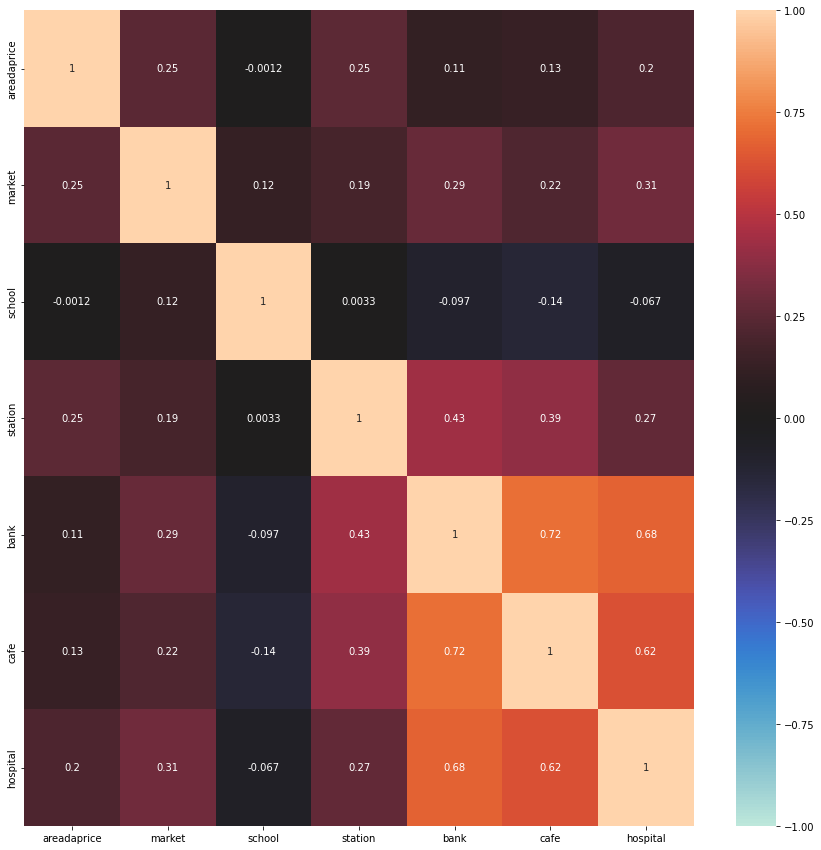

In [591]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, annot=True)

In [592]:
train_df_le = df[~df['areadaprice'].isnull()]
test_df_le = df[df['areadaprice'].isnull()]

In [593]:
import lightgbm as lgb

In [594]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits = folds)

In [595]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [596]:
train_X = train_df_le.drop(['areadaprice'], axis=1)
train_Y = train_df_le['areadaprice']

In [597]:
from sklearn.metrics import mean_squared_error


In [598]:
df.dtypes

areadaprice    float64
market           int64
school           int64
station          int64
bank             int64
cafe             int64
hospital         int64
dtype: object

In [599]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                         lgb_train,
                          valid_sets = lgb_eval,
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval = 10)
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 6
[LightGBM] [Info] Start training from score 4109.564352
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 3.60552e+06
[20]	valid_0's l2: 3.48703e+06
[30]	valid_0's l2: 3.48081e+06
[40]	valid_0's l2: 3.43601e+06
[50]	valid_0's l2: 3.42924e+06
[60]	valid_0's l2: 3.46606e+06
Early stopping, best iteration is:
[45]	valid_0's l2: 3.419e+06
0.3837125092175581
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 6
[LightGBM] [Info] Start training fro

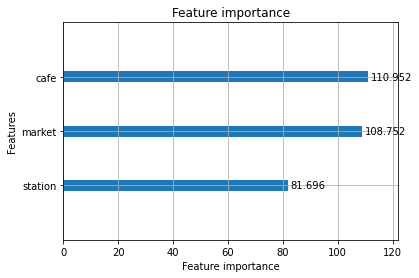

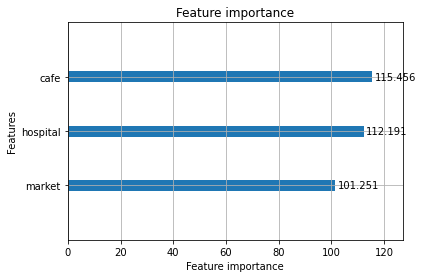

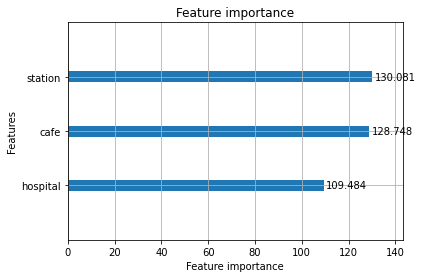

In [614]:
for model in models:
    lgb.plot_importance(model, importance_type='gain', max_num_features=3)

In [601]:
actual_pred_df = pd.DataFrame({
    "actual": train_Y,
    "pred": oof
})

<AxesSubplot:>

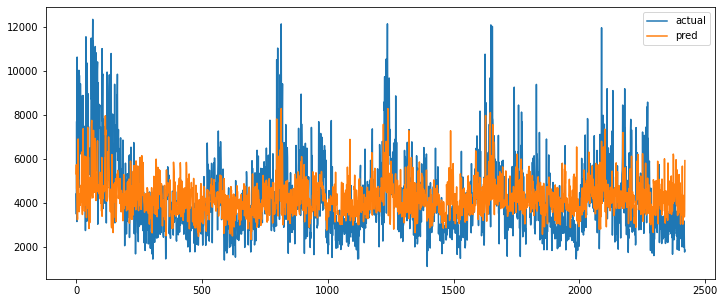

In [602]:
import matplotlib as plt

actual_pred_df.plot(figsize=(12,5))

In [603]:
df['areadaprice'].describe()

count     2420.000000
mean      4223.825992
std       1744.297967
min       1096.000000
25%       2985.000000
50%       3847.200000
75%       5059.550000
max      12348.000000
Name: areadaprice, dtype: float64

<AxesSubplot:ylabel='Frequency'>

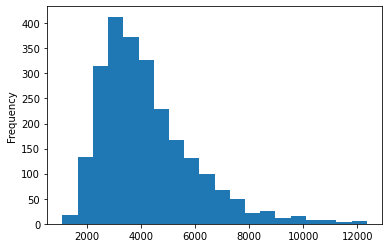

In [604]:
df['areadaprice'].plot.hist(bins=20)

In [605]:
# 포아송 분포

# 잘 일어나지 않는 사건이 실제로 일어날 확률의 분포를 나타낼 때 이용하며, 좌우 대칭인 정규분포와 달리 왼쪽으로 치우침

In [606]:
# 목적 변수를 로그화 하기
# 일반적으로 머신 러닝이나 통계적인 처리의 대부분은 데이터가 정규 분포임을 상정하고 있다. 

<AxesSubplot:ylabel='Frequency'>

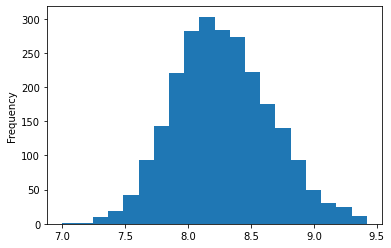

In [607]:
np.log(df['areadaprice']).plot.hist(bins=20)

In [608]:
pd.options.mode.chained_assignment = None
train_df_le['areadaprice_log'] = np.log(train_df_le['areadaprice'])

In [609]:
train_X = train_df_le.drop(['areadaprice', 'areadaprice_log'], axis=1)
train_Y = train_df_le['areadaprice_log']

In [610]:
import warnings
warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                         lgb_train,
                          valid_sets = lgb_eval,
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval = 10)
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 6
[LightGBM] [Info] Start training from score 8.252030
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.15292
[20]	valid_0's l2: 0.148656
[30]	valid_0's l2: 0.148619
[40]	valid_0's l2: 0.148617
Early stopping, best iteration is:
[25]	valid_0's l2: 0.147886
0.38456001685710745
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 6
[LightGBM] [Info] Start training from score 8.281300
Training until validation scores don't improve for 20 rounds


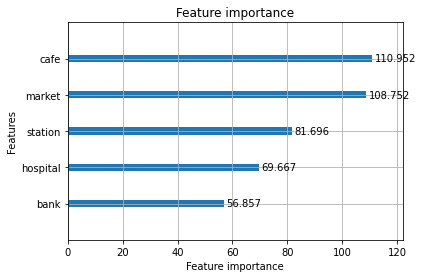

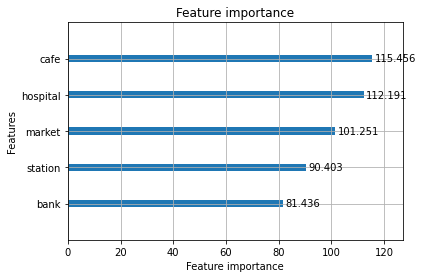

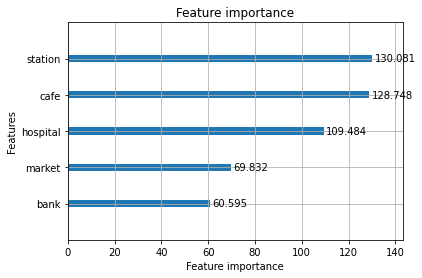

In [611]:
for model in models:
    lgb.plot_importance(model, importance_type='gain', max_num_features=5)

In [612]:
actual_pred_df = pd.DataFrame({
    "actual": train_Y,
    "pred": oof
})

<AxesSubplot:>

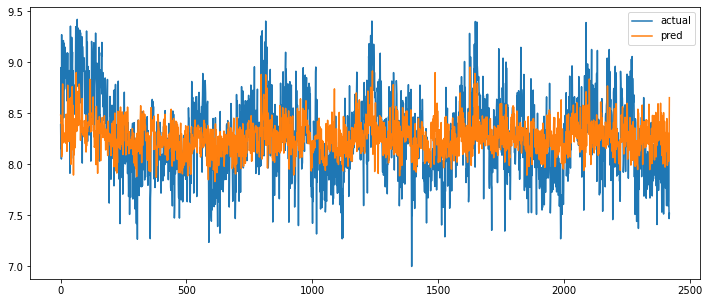

In [613]:
import matplotlib as plt

actual_pred_df.plot(figsize=(12,5))

In [615]:
df_num = df.select_dtypes(include=[np.number])
df_num

,areadaprice,market,school,station,bank,cafe,hospital
0,4395.0,5,4,2,40,107,91
1,3480.0,6,4,2,43,122,98
2,7701.0,5,0,2,48,174,294
3,3141.0,8,0,3,70,317,313
4,10629.0,4,5,3,6,12,11
...,...,...,...,...,...,...,...
2415,2087.0,5,2,0,16,32,42
2416,3164.0,4,1,1,15,58,35
2417,2095.0,2,2,0,21,48,33
2418,1752.0,3,3,1,9,25,7


In [618]:
num_features = sorted(list(set(df_num)))
num_features

['areadaprice', 'bank', 'cafe', 'hospital', 'market', 'school', 'station']

In [619]:
df_num_rs = df_num[num_features]

In [620]:
for col in num_features:
    tmp_df = df_num_rs[(df_num_rs[col] > df_num_rs[col].mean() + df_num_rs[col].std() *3) | (df_num_rs[col] < df_num_rs[col].mean() - df_num_rs[col].std() *3)]
                       
    print(col, len(tmp_df))

areadaprice 41
bank 40
cafe 46
hospital 32
market 16
school 13
station 13


<AxesSubplot:xlabel='bank', ylabel='areadaprice'>

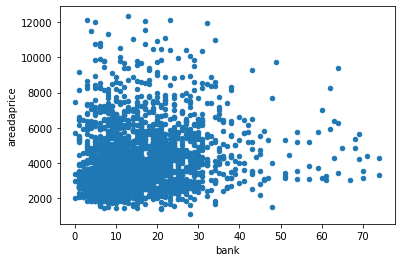

In [621]:
df.plot.scatter(x='bank', y='areadaprice')

In [636]:
df[(df['bank'] >5) & (df['areadaprice'] > 10000)]

,areadaprice,market,school,station,bank,cafe,hospital
4,10629.0,4,5,3,6,12,11
11,10028.0,4,3,3,11,21,19
39,11554.0,7,2,1,17,26,34
44,10352.7,6,1,1,31,48,74
65,10911.0,5,3,2,20,57,64
66,12348.0,5,2,5,13,72,31
68,11365.6,7,4,2,8,14,20
69,10451.0,11,4,4,23,75,99
76,11110.0,12,6,4,22,66,84
79,10827.2,2,5,2,6,9,10


<AxesSubplot:xlabel='station', ylabel='areadaprice'>

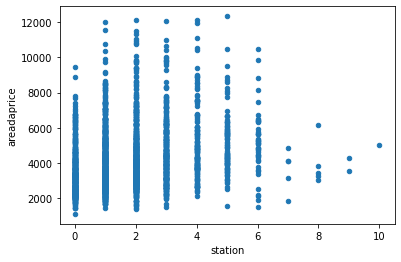

In [623]:
df.plot.scatter(x='station', y='areadaprice')

<AxesSubplot:xlabel='cafe', ylabel='areadaprice'>

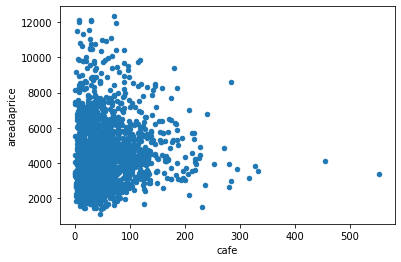

In [624]:
df.plot.scatter(x='cafe', y='areadaprice')

<AxesSubplot:xlabel='school', ylabel='areadaprice'>

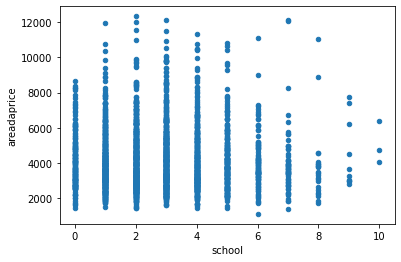

In [627]:
df.plot.scatter(x='school', y='areadaprice')

In [637]:
df[df['school'] > 6]

,areadaprice,market,school,station,bank,cafe,hospital
7,3930.0,9,8,5,1,6,1
8,8290.0,8,7,5,6,11,17
74,8875.0,11,8,5,22,34,50
118,6349.0,8,7,5,30,29,34
275,2974.2,2,9,2,14,26,19
...,...,...,...,...,...,...,...
2362,4049.0,8,8,0,20,41,41
2368,4056.8,7,10,1,12,10,8
2391,2238.0,1,8,1,7,2,4
2392,4091.8,4,7,0,18,59,50


<AxesSubplot:xlabel='hospital', ylabel='areadaprice'>

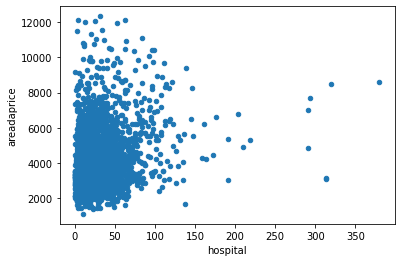

In [628]:
df.plot.scatter(x='hospital', y='areadaprice')

In [ ]:
df = df[(df['bank'] > 200) | (df['areadaprice'].isnull())]
df = df[(df['school'] > 200) | (df['areadaprice'].isnull())]
df = df[(df['bank'] > 200) | (df['areadaprice'].isnull())]
df = df[(df['bank'] > 200) | (df['areadaprice'].isnull())]